In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query(text('SELECT * FROM useducation'), con=engine.connect())

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

For Total_Revenue and Total_Expenditure, do these variables have outlier values? 



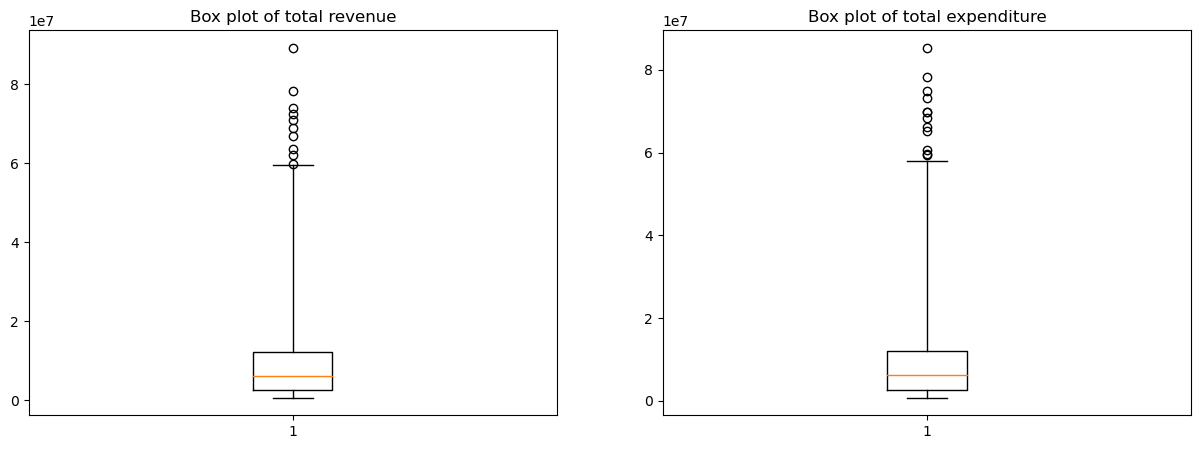

In [4]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

Detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables by eliminating them and validating that there's no outlier values afterwards.

Start with winsorization and create two new variables.

In [5]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

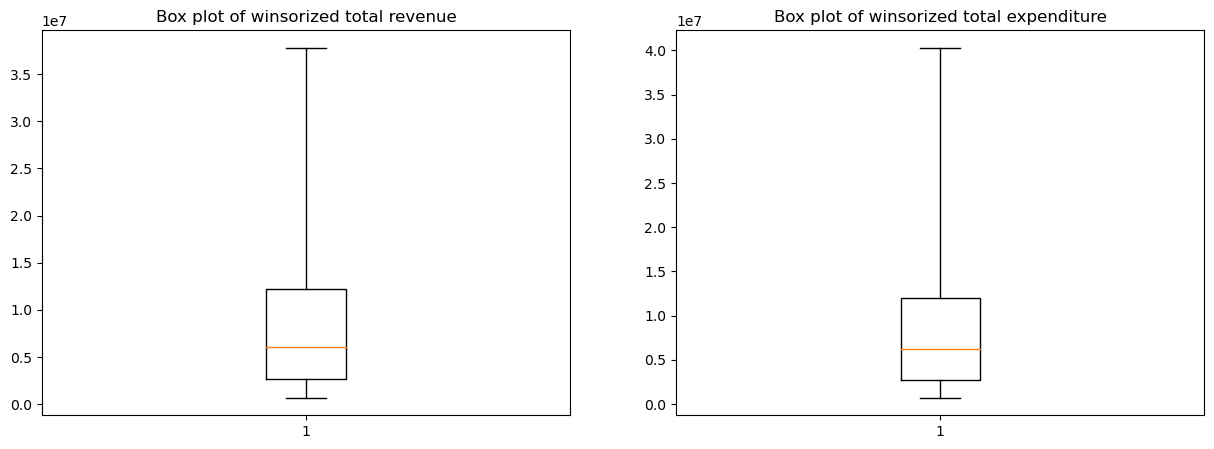

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

In [ ]:
# Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE.

In [7]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

Text(0.5, 1.0, 'Box plot of budget deficit')

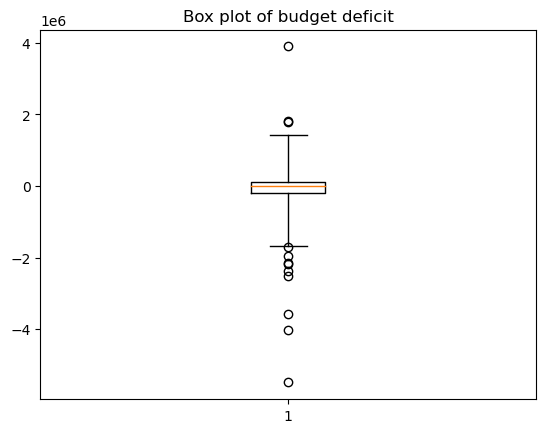

In [8]:
plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

In [9]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of budget deficit')

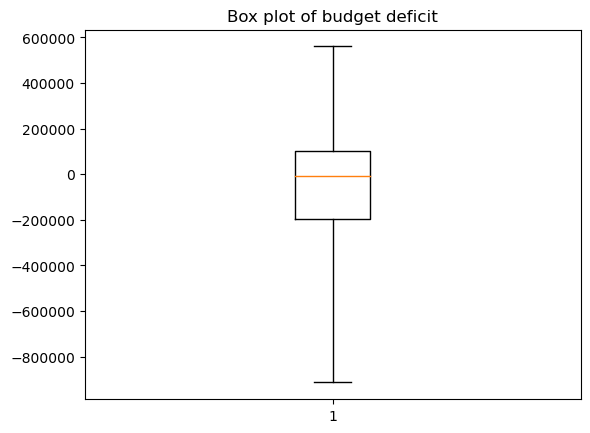

In [10]:
plt.boxplot(winsorized_budget, whis = 5)
plt.title("Box plot of budget deficit")

In [ ]:
# Create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. But this time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE.

In [11]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure

Text(0.5, 1.0, 'Box plot of budget deficit 2')

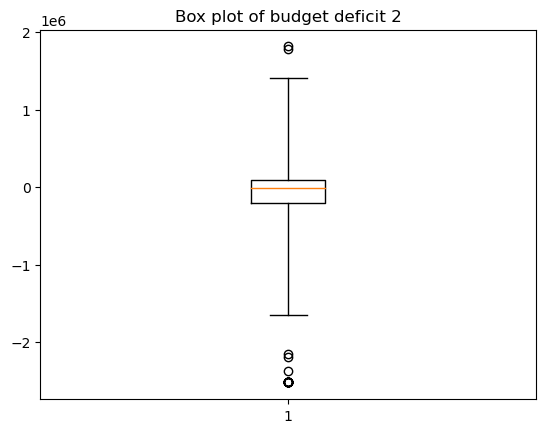

In [12]:
plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot of budget deficit 2")

In [13]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of budget deficit 2')

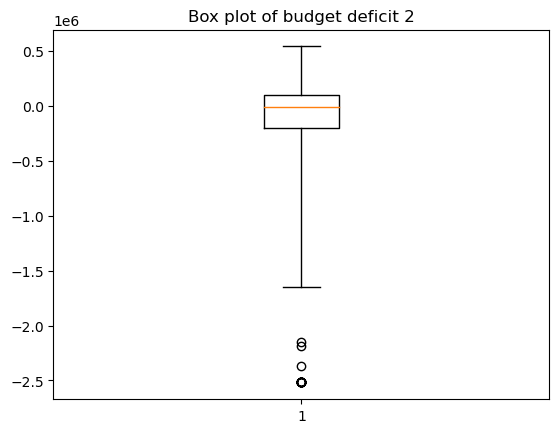

In [14]:
plt.boxplot(winsorized_budget2, whis = 5)
plt.title("Box plot of budget deficit 2")

In [15]:
# Basic statistics of the budget variables 

pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-8.872500e+03,-8872.500000,-1.282350e+04
75%,1.013948e+05,101394.750000,9.826300e+04
max,3.897129e+06,560511.000000,5.400550e+05


Sometimes, differencing may help us to eliminate the outliers. So, it's better to first create a variable from the originals and then to apply outlier elimination techniques next. Hence, the approach in the third question is more desirable in most of the cases.